>> LINAC #1
>> SHOT #1
Tracking element #1 (s = 120.0 m, -2.70 nC, 3.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 124.2 m, -2.70 nC, 26.6 GeV, StageNonlinear1D, stage 1)
Tracking element #3 (s = 132.3 m, -2.70 nC, 26.6 GeV, InterstageBasic, stage 1)
Tracking element #4 (s = 136.5 m, -2.70 nC, 51.2 GeV, StageNonlinear1D, stage 2)
Tracking element #5 (s = 147.5 m, -2.70 nC, 51.2 GeV, InterstageBasic, stage 2)
Tracking element #6 (s = 151.8 m, -2.70 nC, 76.0 GeV, StageNonlinear1D, stage 3)
Tracking element #7 (s = 165.2 m, -2.70 nC, 76.0 GeV, InterstageBasic, stage 3)
Tracking element #8 (s = 169.4 m, -2.70 nC, 102.4 GeV, StageNonlinear1D, stage 4)
Tracking element #9 (s = 184.8 m, -2.70 nC, 102.4 GeV, InterstageBasic, stage 4)
Tracking element #10 (s = 189.0 m, -2.70 nC, 127.4 GeV, StageNonlinear1D, stage 5)
Tracking element #11 (s = 206.1 m, -2.70 nC, 127.4 GeV, InterstageBasic, stage 5)
Tracking element #12 (s = 210.4 m, -2.70 nC, 152.5 GeV, StageNonlinear1D, stage 6)
Tracking

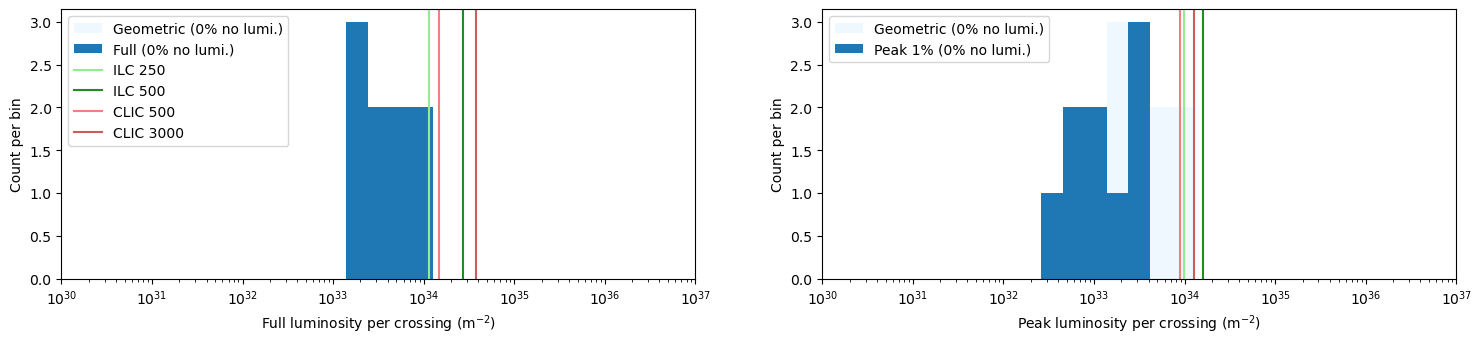

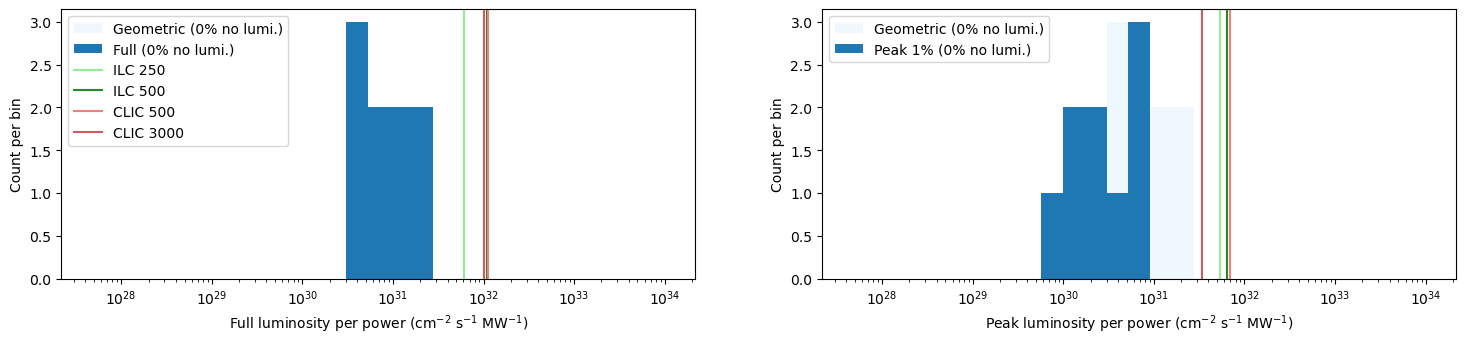

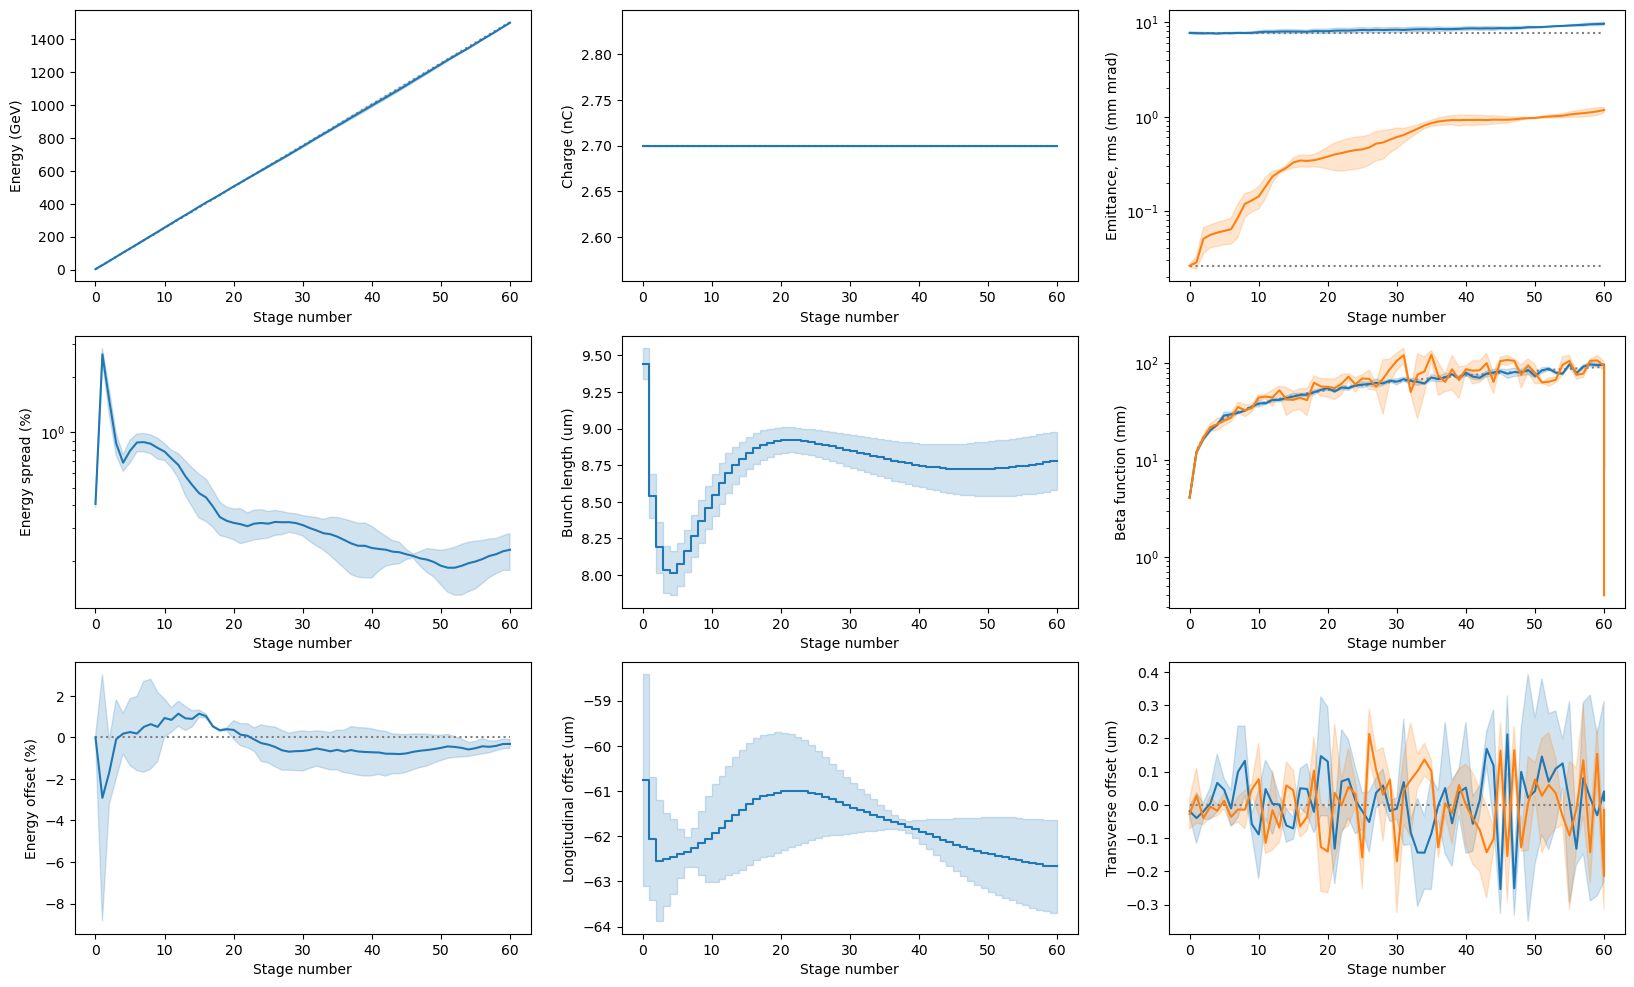

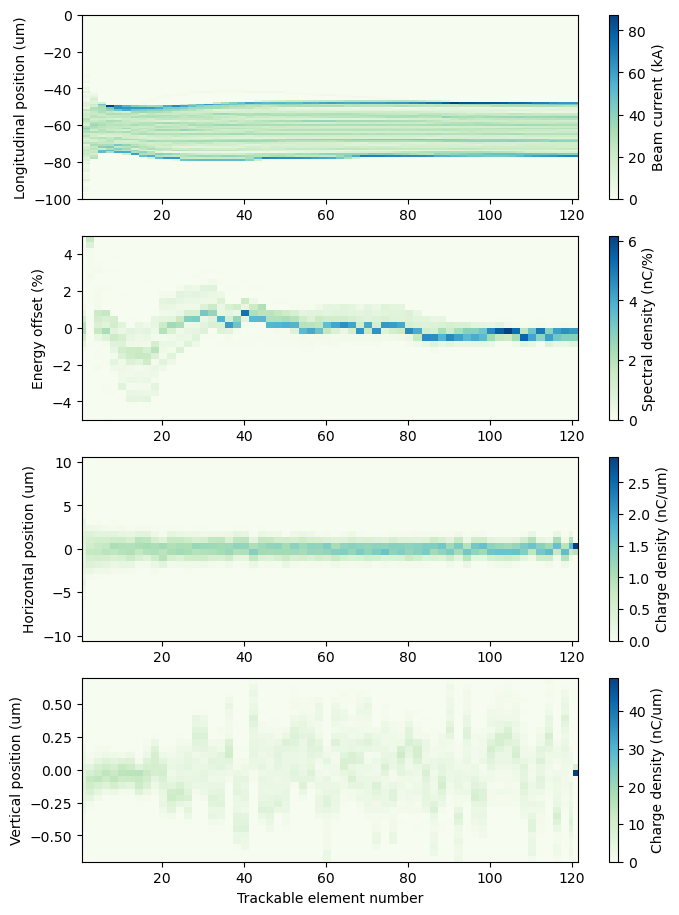

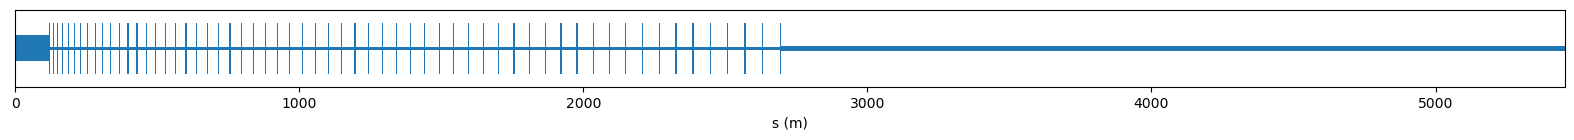

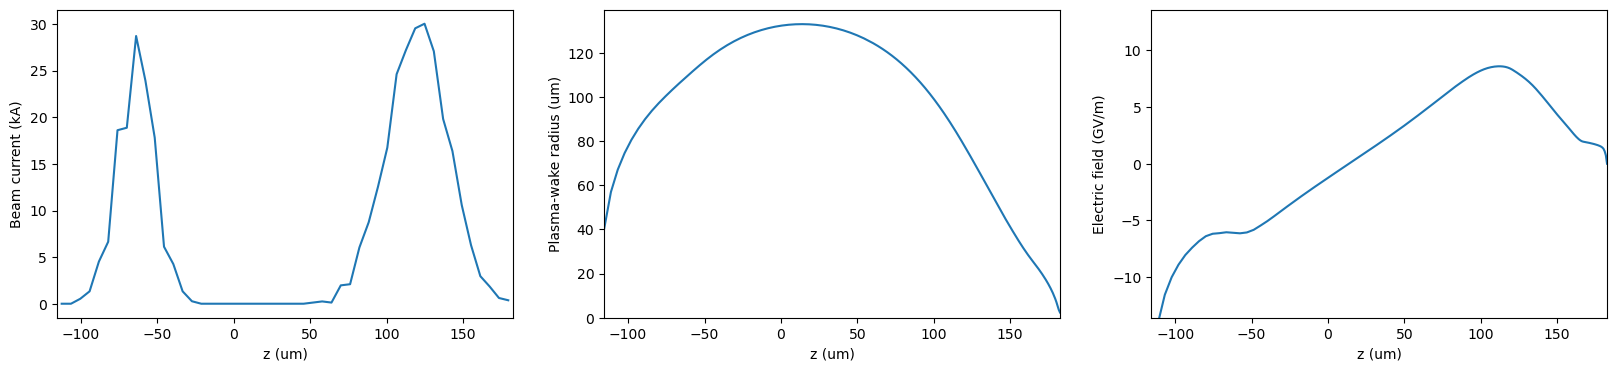

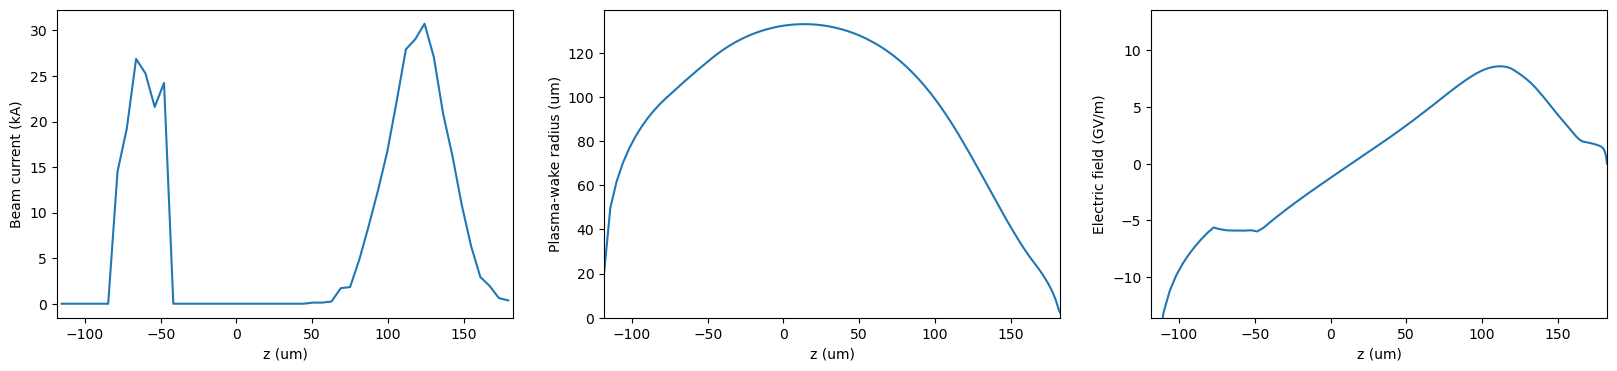

In [11]:
import sys
sys.path.append('../')
from opal import Linac, Collider
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, InterstageBasic, BeamDeliverySystemBasic, InteractionPointGUINEAPIG
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define driver
driver = SourceBasic()
driver.Q = -5e-9 # [C]
driver.E0 = 38e9 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 120e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 30e-3, 30e-3 # [m]
driver.Npart = 2000
driver.wallplugEfficiency = 0.5
driver.jitter.t0 = 5e-15 # [s]
driver.jitter.x0, driver.jitter.y0 = 50e-9, 50e-9# [m]
driver.acceleratingGradient = 25e6 # [V/m]

# define stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.deltaE = 25e9 # [eV]
stage.L = 4.25 # [m]
stage.n0 = 2e22 # [m^-3]
stage.reljitter.n0 = 0.01
stage.enableBetatron = True

# define beam
source = SourceBasic()
#source.L = 10 # [m]
source.Q = -2.7e-9 # [C]
source.E0 = 3e9 # [eV]
source.relsigE = 0.005
source.sigz = 12e-6 # [m]
source.z = -60e-6 # [m]
source.emitnx = 10e-6 # [m rad]
source.emitny = 0.035e-6 # [m rad]
source.betax = beta_matched(stage.n0, source.E0) # [m]
source.betay = source.betax
source.Npart = 500
source.wallplugEfficiency = 0.1
source.jitter.t0 = 5e-15 # [s]
source.jitter.x0, source.jitter.y0 = 50e-9, 50e-9 # [m]
source.acceleratingGradient = 25e6 # [V/m]

# define interstage
#interstage = InterstageELEGANT()
interstage = InterstageBasic()
interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
interstage.Bdip = 0.5 # [T]
interstage.Ldip = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.enableISR = True
interstage.enableCSR = False

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_waist_x = 8e-3 # [m]
bds.beta_waist_y = 0.4e-3 # [m]
#bds.L = 20 # [m]

# define linac
linac = Linac(source, stage, interstage, bds, Nstages = 60, alternatingInterstagePolarity=False)

# define interaction point
ip = InteractionPointGUINEAPIG()

# define collider
collider = Collider(linac, ip)

# track particles
collider.run("high-energy-collider_test", shots=3, overwrite=True)

# plot survery and beam evolution
print(f"COST: {collider.constructionCost()/1e9:.2f} (construction) + {collider.runningCost()/1e9:.2f} (running) = {collider.totalCost()/1e9:.2f} billion LCU")
collider.plotLuminosity()
collider.plotLuminosityPerPower()
linac.plotEvolution(useStageNumbers=True)
linac.plotWaterfalls()
linac.plotSurvey()
stage.plotWakefield(linac.initialBeam())
stage.plotWakefield(linac.finalBeam())